<a href="https://colab.research.google.com/github/Malbasahi/CodeClauseInternship_House_Price_Predication/blob/main/House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet, BayesianRidge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Load your dataset (replace 'house_data.csv' with your dataset file)
data = pd.read_csv('/content/House-Price-Prediction-clean.csv')

In [3]:
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [5]:
data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

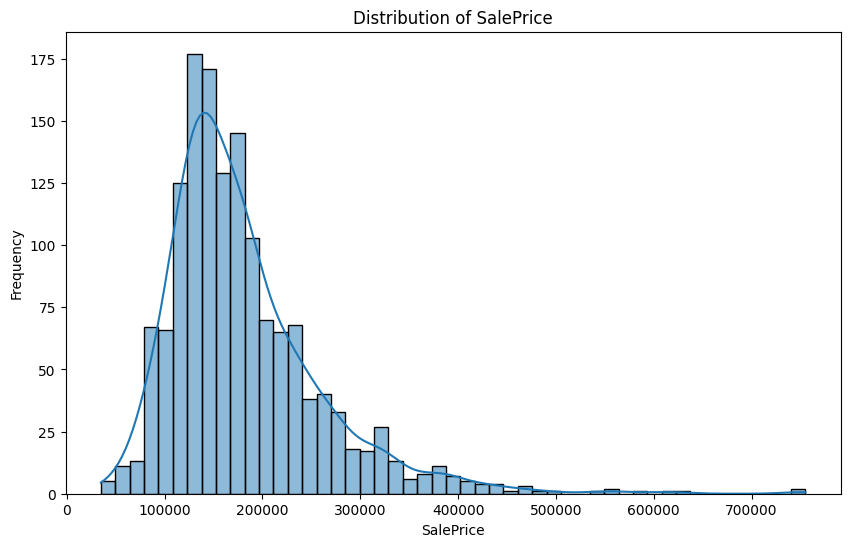

In [6]:
# Visualize the distribution of the target variable 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Feature engineering (Example: Creating a new feature)
data['BathroomsToBedroomsRatio'] = data['FullBath'] / data['BedroomAbvGr']

In [8]:
# Compute correlations between features and target variable 'SalePrice'
correlations = data[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea','BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice']].corr()['SalePrice'].abs()

# Sort features by their absolute correlation values in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Select the top N most relevant features
top_n = 5  # Adjust this value as needed
most_relevant_features = sorted_correlations[1:top_n+1].index.tolist()  # Exclude 'SalePrice' from the list

print("Top {} most relevant features:".format(top_n))
print(most_relevant_features)

Top 5 most relevant features:
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']


<Figure size 500x500 with 0 Axes>

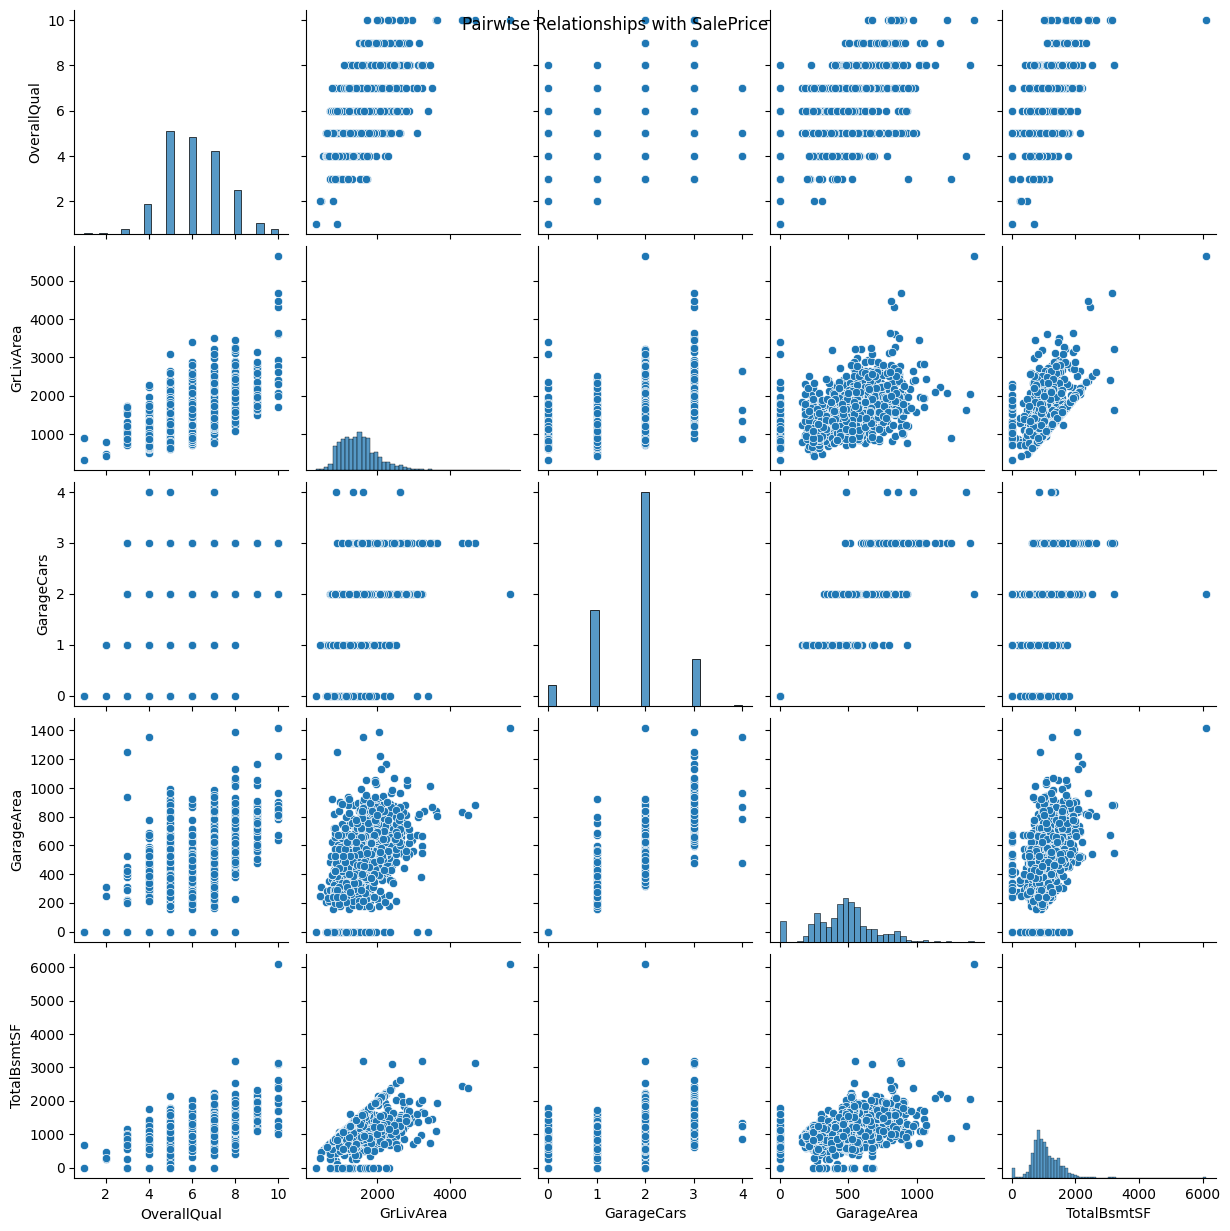

In [9]:
plt.figure(figsize=(5, 5))
sns.pairplot(data[most_relevant_features])
plt.suptitle('Pairwise Relationships with SalePrice')
plt.show()

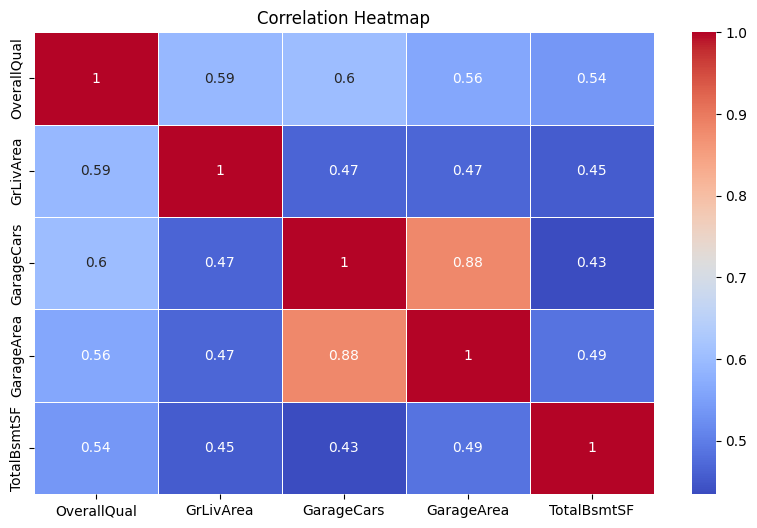

In [10]:
# Heatmap of correlations between features
correlation_matrix = data[most_relevant_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Feature selection: Select relevant features
X = data[most_relevant_features]
y = data['SalePrice']

In [14]:
data[most_relevant_features].columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF'], dtype='object')

In [15]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor()

In [18]:
# Define the number of cross-validation folds
num_folds = 5

In [19]:
# Create a KFold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [20]:
# Define the hyperparameters and their respective values to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [21]:
# Create a GridSearchCV object with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(gb_model, param_grid, scoring='neg_mean_squared_error', cv=5)
# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [22]:
# Get the best model and its hyperparameters
best_gb_model = grid_search.best_estimator_
best_gb_mse = -grid_search.best_score_

In [23]:
# Define the best model based on Grid Search results
best_model_name = 'Gradient Boosting (Tuned Hyperparameters)'
best_model = best_gb_model

In [24]:
# Fit the best model on the entire training set
best_gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=300)

In [25]:
# Make predictions using the best model
y_pred_best = best_gb_model.predict(X_test_scaled)

In [26]:
# Calculate the Mean Squared Error (MSE) and R-squared (R2) score of the best model
# Perform cross-validation and calculate MSE for each fold
mse_scores = -cross_val_score(gb_model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

In [27]:
# Calculate the mean and standard deviation of MSE scores across folds
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

In [28]:
# Display the results
# Display the results
print(f"Mean MSE across {num_folds}-fold Cross-Validation: {mean_mse:.2f}")
print(f"Standard Deviation of MSE across {num_folds}-fold Cross-Validation: {std_mse:.2f}")
print(f"Best Model based on MSE: Gradient Boosting (Tuned Hyperparameters)")
print(f"Mean Squared Error (MSE) of the Best Model: {mse_best:.2f}")
print(f"R-squared (R2) Score of the Best Model: {r2_best:.4f}")
print("Best Hyperparameters:")
print(grid_search.best_params_)

Mean MSE across 5-fold Cross-Validation: 1281676227.72
Standard Deviation of MSE across 5-fold Cross-Validation: 438804325.12
Best Model based on MSE: Gradient Boosting (Tuned Hyperparameters)
Mean Squared Error (MSE) of the Best Model: 1086552858.00
R-squared (R2) Score of the Best Model: 0.8583
Best Hyperparameters:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [29]:
# Initialize regression models for detailed comparison
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine (SVR)': SVR(),
    'K-Nearest Neighbors (KNN)': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Elastic Net': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
}

In [30]:
# Model comparison and evaluation
results = {'Model': [], 'MSE': [], 'R2 Score': []}
best_model = None
best_mse = float('inf')

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['R2 Score'].append(r2)

    if mse < best_mse:
        best_mse = mse
        best_model = model_name

In [31]:
print("\nModel Comparison:")
for model_name, mse, r2 in zip(results['Model'], results['MSE'], results['R2 Score']):
    print(f"{model_name}:")
    print(f"  - Mean Squared Error (MSE): {mse:.2f}")
    print(f"  - R-squared (R2) Score: {r2:.4f}")
    print("\n")


Model Comparison:
Linear Regression:
  - Mean Squared Error (MSE): 1598354833.09
  - R-squared (R2) Score: 0.7916


Ridge Regression:
  - Mean Squared Error (MSE): 1598669282.12
  - R-squared (R2) Score: 0.7916


Lasso Regression:
  - Mean Squared Error (MSE): 1598364909.39
  - R-squared (R2) Score: 0.7916


Random Forest:
  - Mean Squared Error (MSE): 979634614.67
  - R-squared (R2) Score: 0.8723


Gradient Boosting:
  - Mean Squared Error (MSE): 940584376.62
  - R-squared (R2) Score: 0.8774


Support Vector Machine (SVR):
  - Mean Squared Error (MSE): 7847761335.92
  - R-squared (R2) Score: -0.0231


K-Nearest Neighbors (KNN):
  - Mean Squared Error (MSE): 1367179740.33
  - R-squared (R2) Score: 0.8218


Decision Tree:
  - Mean Squared Error (MSE): 1493848294.04
  - R-squared (R2) Score: 0.8052


Elastic Net:
  - Mean Squared Error (MSE): 1928103669.49
  - R-squared (R2) Score: 0.7486


Bayesian Ridge:
  - Mean Squared Error (MSE): 1599637882.06
  - R-squared (R2) Score: 0.7915




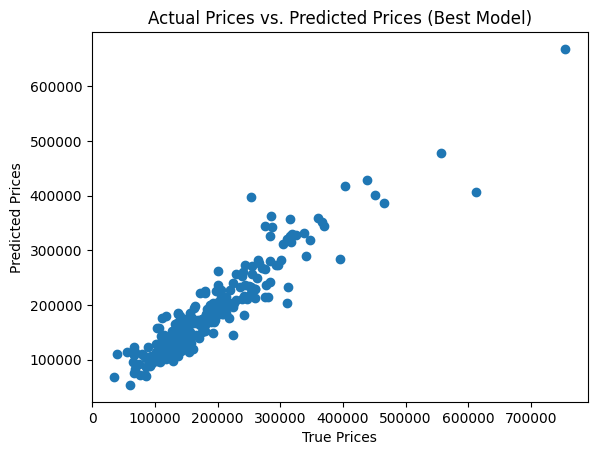

In [32]:
# Visualize the results (e.g., scatter plot of actual vs. predicted prices for the best model) (no changes)
best_model = models[best_model]
y_pred_best = best_model.predict(X_test_scaled)

plt.scatter(y_test, y_pred_best)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Best Model)')
plt.show()

In [33]:
# Select the best model based on MSE
print(f"\nBest Model based on MSE: {best_model}")
print(f"Mean Squared Error (MSE) of the Best Model: {best_mse}")


Best Model based on MSE: GradientBoostingRegressor()
Mean Squared Error (MSE) of the Best Model: 940584376.6158626


In [34]:
# Calculate the range of sale prices
min_sale_price = data['SalePrice'].min()
max_sale_price = data['SalePrice'].max()
sale_price_range = max_sale_price - min_sale_price

# Calculate the relative MSE as a percentage of the range
relative_mse = (best_gb_mse / sale_price_range) * 100

# Display the results
print(f"Min Sale Price: ${min_sale_price}")
print(f"Max Sale Price: ${max_sale_price}")
print(f"Sale Price Range: ${sale_price_range}")
print(f"Relative MSE as a Percentage of Range: {relative_mse:.2f}%")


Min Sale Price: $34900
Max Sale Price: $755000
Sale Price Range: $720100
Relative MSE as a Percentage of Range: 180463.26%


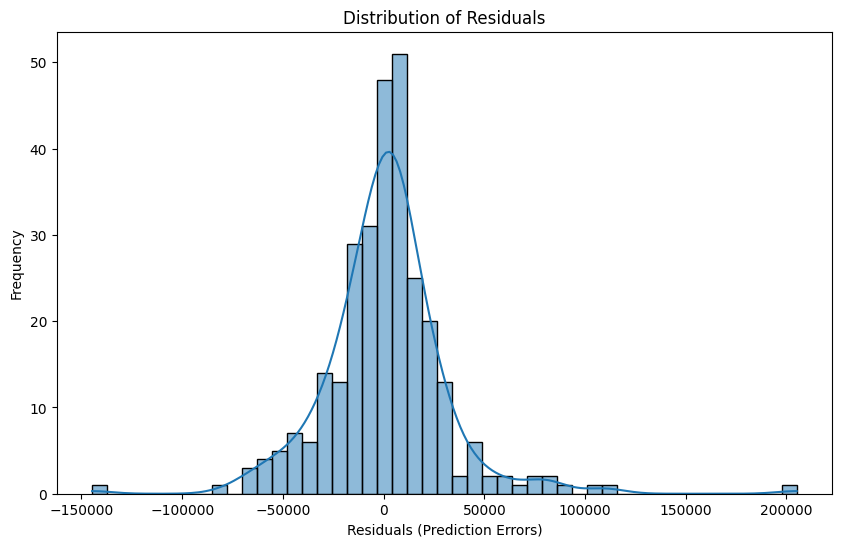

In [35]:
# Calculate residuals (errors)
residuals = y_test - y_pred_best

# Plot a histogram of residuals to examine their distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Prediction Errors)')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Example new data
new_data = pd.DataFrame({
    'OverallQual': [7, 8, 6, 9],
    'GrLivArea': [2000, 2200, 1800, 2500],
    'GarageCars': [2, 2, 2, 3],
    'GarageArea': [500, 550, 480, 600],
    'TotalBsmtSF': [1000, 1100, 950, 1200],
})

# Preprocess and scale the new data using the same scaler used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions for the new data using the trained model
new_data_predictions = best_gb_model.predict(new_data_scaled)

# Display the predictions
print("Predictions for the new data:")
print(new_data_predictions)

Predictions for the new data:
[205888.4428461  262477.62534101 178988.78663176 337663.96211747]


In [37]:
# Assuming you have the actual sale prices for the new data
actual_sale_prices = [205888.4428461, 262477.62534101, 178988.78663176, 337663.96211747]

# Calculate Mean Squared Error (MSE) for the new data predictions
new_data_mse = mean_squared_error(actual_sale_prices, new_data_predictions)

# Calculate R-squared (R2) score for the new data predictions
new_data_r2 = r2_score(actual_sale_prices, new_data_predictions)

# Display the evaluation metrics
print(f"Mean Squared Error (MSE) for New Data Predictions: {new_data_mse:.2f}")
print(f"R-squared (R2) Score for New Data Predictions: {new_data_r2:.4f}")

Mean Squared Error (MSE) for New Data Predictions: 0.00
R-squared (R2) Score for New Data Predictions: 1.0000
